<a href="https://colab.research.google.com/github/ZhangxjMia/machine_learning/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Prediction**



## **The Dataset**

The dataset to be used in this webinar is a CSV file named `Churn Modeling.csv`, which contains data on bank customers churning and some of their key behaviors. It contains the following columns:

**Features**:

- `RowNumber`: Row number of the records.
- `CustomerID`: Unique identifier of a customer.
- `Surname`: Surname of customer.
- `CreditScore`: Credit score of customer.
- `Geography`: Location of customer.
- `Gender`: Gender of customer.
- `Tenure`: Number of years as a customer.
- `Balance`: Balance in customer's account.
- `NumOfProducts`: Number of products that customer has.
- `HasCrCard`: Binary variable if customer has a credit card.
- `IsActiveMember`: Binary variable if customer is a active member.
- `EstimatedSalary`: Estimated annual salary of a customer.

**Target Variable**:

- `Exited`: Whether customer `'Stayed'` or `'Churned'`.


In [1]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Exploration

In [2]:
# Load dataset
from google.colab import files
uploaded = files.upload()

Saving Churn Modeling.csv to Churn Modeling.csv


In [3]:
bank = pd.read_csv("Churn Modeling.csv")

In [4]:
# header
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# info
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# numerical data statistics
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
# unique values in bank
bank.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

$$\large{null \space accuracy = \frac{\# \space times \space model \space predicted \space "Stayed"}{total \space number \space of \space predictions}}$$

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Proportion of customer churned and retained')

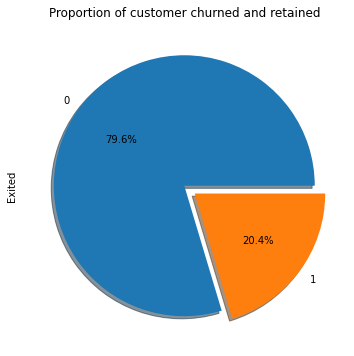

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
# null accuracy
value_counts = pd.value_counts(bank['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1],autopct='%1.1f%%', shadow=True)
plt.title('Proportion of customer churned and retained')
plt.show()
value_counts

In this case, the null model (always predicting 0, which customers retained) is 79.6%. Any meaningful model that improves performance will have to break that accuracy score.

## Data Cleaning

In [9]:
# Drop RowNumber, CustomerId, and Surname
bank.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Check number of missing values
bank.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Convert "HasCrCard" and "IsActiveMember" to object
bank['HasCrCard'] = bank['HasCrCard'].astype(str)
bank['IsActiveMember'] = bank['IsActiveMember'].astype(str)

## Exploratory Data Analysis (EDA)

In [12]:
# Get all features
features = [column_name for column_name in bank.columns if column_name != 'Exited']

# Get all categorical features
categorical = [column_name for column_name in features if bank[column_name].dtype == 'object']

# Get all numeric columns
numeric = [column_name for column_name in features if column_name not in categorical]

In [13]:
# Print them out and make sure
print(features)
print(categorical)
print(numeric)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


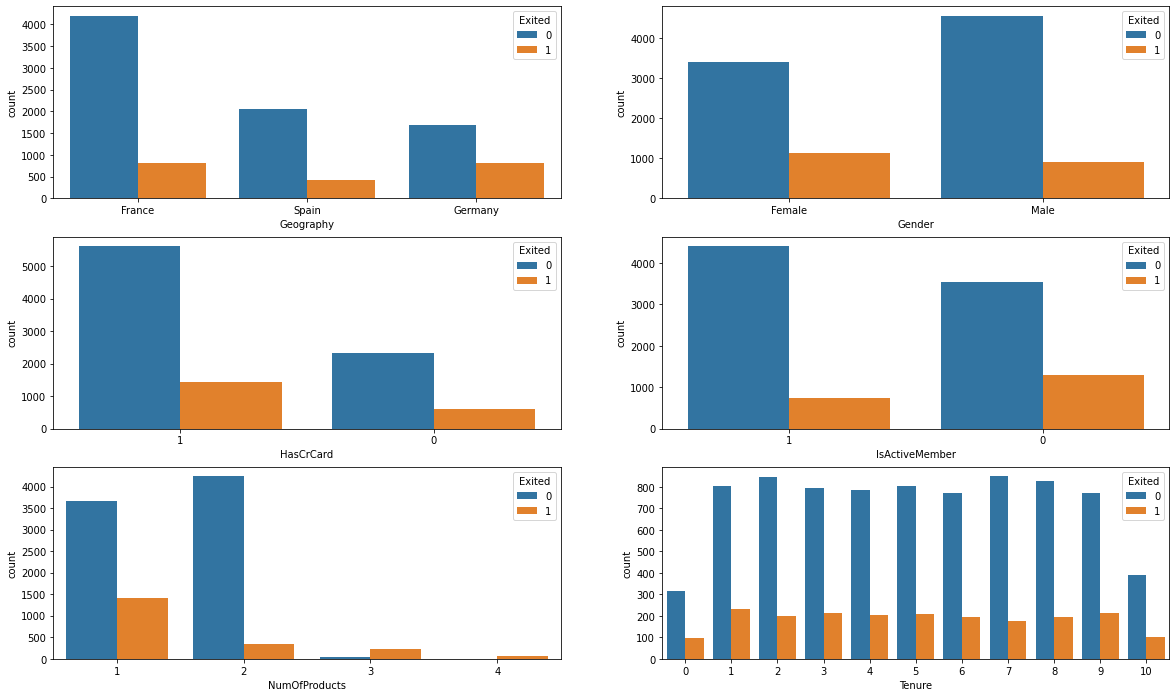

In [14]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = bank, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = bank, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = bank, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = bank, ax=axarr[1][1])
sns.countplot(x='NumOfProducts', hue = 'Exited',data = bank, ax=axarr[2][0])
sns.countplot(x='Tenure', hue = 'Exited',data = bank, ax=axarr[2][1])



*   Among France, Spain, and Germany, the majority of customers are from France.
*   Female customers have relatively higher churn rate than male customers.
*   Customers who don't have credit card have relatively higher churn rate than customers who have credit card.
*   Inactive customers are more likely to exit.
*   The more products customers have, the more likely they churn.
*   The churn rate is stable no matter how many tenure they have.










### Visualizing target variable relationship with numerical features

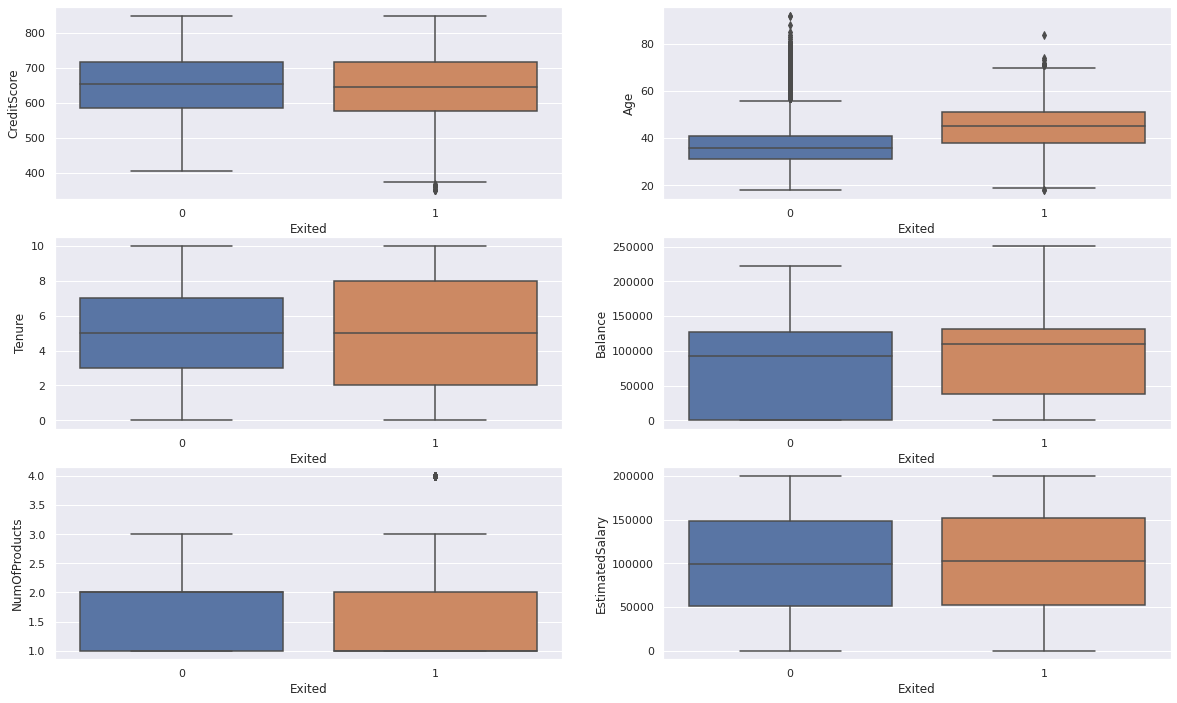

In [15]:
# Setting aesthetics for better viewing
plt.rcParams["axes.labelsize"] = 1
sns.set(font_scale=1) 
 
# Create figure and axes
fig, axes = plt.subplots(3, 2, figsize = (20, 12))

# Iterate over each axes, and plot a boxplot with numeric columns
for ax, column in zip(axes.flatten(), numeric):
    
    # Create a boxplot
    sns.boxplot(x = 'Exited', y = column, data = bank, ax = ax)

*   Retained customers have sightly higher credit score than churned customers.
*   Number of products, tenure and estimated salary seem to don't affect churn.
*   Older customers tend to churn.
*   In this case, churned customers have higher balance. On the contrary, customers with lower balance stay.




## Data Preprocessing

### Standardization - Numerical Data
$$\large{x_{scaled} = \frac{x - mean}{std}}$$

In [16]:
# Split data between X and label
X = bank[features]
y = bank['Exited']

In [17]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [19]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Intialize a scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train[numeric])

# Transform training and test data
train_numeric_transform = scaler.transform(X_train[numeric])
test_numeric_transform = scaler.transform(X_test[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
# Replace columns in training and testing data accordingly
X_train[numeric] = train_numeric_transform
X_test[numeric] = test_numeric_transform

### Dummy Encoding - Categorical Data

In [21]:
# One hot encode categorical variables
X_train = pd.get_dummies(X_train, columns=categorical, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical, drop_first=True)

In [22]:
# Check X_train
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
9174,-1.251581,2.091987,-1.386995,-1.215055,0.794902,1.590503,0,0,1,1,1
4379,0.196946,-0.935052,0.688309,-1.215055,0.794902,0.665504,0,0,1,1,1
541,-0.289345,-1.218837,1.380078,-1.215055,0.794902,0.927786,0,0,1,1,1
7251,0.766010,-0.745862,1.380078,0.985079,-0.919727,-1.510774,1,0,1,1,0
1135,0.859130,-0.745862,0.342425,1.297580,0.794902,1.358040,1,0,1,0,0


## Modeling

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### K-Nearest Neighbors

In [24]:
# Set k range from 1 to 15, use grid search cross-validation to find the best k
k_range = list(range(1,16))
param_grid = {'n_neighbors': k_range}

knn = KNeighborsClassifier()
knn_clf = GridSearchCV(knn,
                       param_grid,
                       return_train_score = True)
knn_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Number of neighbors: k')

Text(0, 0.5, 'Accuracy score')

([<matplotlib.axis.XTick at 0x7f8cfd8c72e8>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15')])

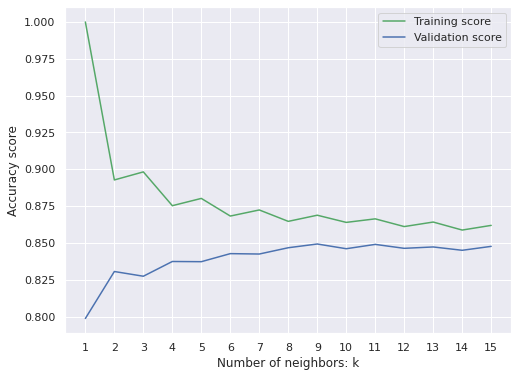

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.868867,0.849333,{'n_neighbors': 9}
2,0.866400,0.849067,{'n_neighbors': 11}
3,0.861967,0.847733,{'n_neighbors': 15}
4,0.864233,0.847333,{'n_neighbors': 13}
5,0.864700,0.846800,{'n_neighbors': 8}
6,0.861167,0.846400,{'n_neighbors': 12}
7,0.864000,0.846133,{'n_neighbors': 10}
8,0.858800,0.845067,{'n_neighbors': 14}
9,0.868300,0.842800,{'n_neighbors': 6}


In [25]:
# View the complete result
results = pd.DataFrame(knn_clf.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)
x_axis = k_range

# Plot the mean cross_validation scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_scores, label='Training score', c='g')
plt.plot(x_axis, test_scores, label='Validation score', c='b')
plt.xlabel('Number of neighbors: k')
plt.ylabel('Accuracy score')
plt.xticks(range(1, len(k_range) + 1), k_range)
plt.legend()
plt.show()

results.set_index(['rank_test_score']).sort_index()[[
    'mean_train_score', 'mean_test_score', 'params'
]]

In [26]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.2%}'.format(
    knn_clf.best_params_, knn_clf.best_score_))

Best Parameter: {'n_neighbors': 9}
Average cross-validation score: 84.93%


In [27]:
y_pred = knn_clf.predict(X_test)
print('The accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('The precision score: {:.3f}'.format(precision_score(y_test, y_pred, average='macro')))
print('The recall score: {:.3f}'.format(recall_score(y_test, y_pred, average='macro')))
print('The f1 score: {:.3f}'.format(f1_score(y_test, y_pred, average='macro')))

The accuracy score: 0.849
The precision score: 0.796
The recall score: 0.694
The f1 score: 0.725


### Logistic Regression

In [28]:
c_range = [0.01, 0.1, 1, 10, 100]
param_grid = {'C': c_range, 'penalty': ['l1', 'l2']}

log = LogisticRegression(solver='liblinear')
log_clf = GridSearchCV(log,
                          param_grid,
                          return_train_score=True)
log_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Regularization parameter: C')

Text(0, 0.5, 'Accuracy score')

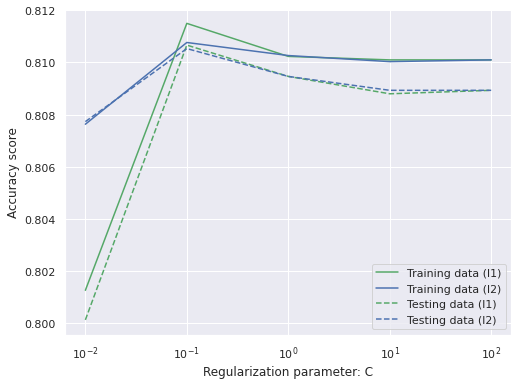

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.811500,0.810667,"{'C': 0.1, 'penalty': 'l1'}"
2,0.810767,0.810533,"{'C': 0.1, 'penalty': 'l2'}"
3,0.810233,0.809467,"{'C': 1, 'penalty': 'l1'}"
3,0.810267,0.809467,"{'C': 1, 'penalty': 'l2'}"
5,0.810033,0.808933,"{'C': 10, 'penalty': 'l2'}"
5,0.810100,0.808933,"{'C': 100, 'penalty': 'l1'}"
5,0.810100,0.808933,"{'C': 100, 'penalty': 'l2'}"
8,0.810100,0.808800,"{'C': 10, 'penalty': 'l1'}"
9,0.807633,0.807733,"{'C': 0.01, 'penalty': 'l2'}"


In [28]:
# view the complete results
results = pd.DataFrame(log_clf.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 2)
train_scores = np.array(results.mean_train_score).reshape(5, 2)
x_axis = c_range

# plot the mean cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_scores[:, 0], label='Training data (l1)', color='g')
plt.plot(x_axis, train_scores[:, 1], label='Training data (l2)', color='b')
plt.plot(x_axis, test_scores[:, 0], label='Testing data (l1)', color='g', linestyle='dashed')
plt.plot(x_axis, test_scores[:, 1], label='Testing data (l2)', color='b', linestyle='dashed')
plt.legend()
plt.xscale('log')
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy score')
plt.show()

results.set_index(['rank_test_score']).sort_index()[[
    'mean_train_score', 'mean_test_score', 'params'
]]

In [29]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.2%}'.format(
    log_clf.best_params_, log_clf.best_score_))

Best Parameter: {'C': 0.1, 'penalty': 'l1'}
Average cross-validation score: 81.07%


In [30]:
y_pred = log_clf.predict(X_test)
print('The accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('The precision score: {:.3f}'.format(precision_score(y_test, y_pred, average='macro')))
print('The recall score: {:.3f}'.format(recall_score(y_test, y_pred, average='macro')))
print('The f1 score: {:.3f}'.format(f1_score(y_test, y_pred, average='macro')))

The accuracy score: 0.812
The precision score: 0.729
The recall score: 0.590
The f1 score: 0.605


### Decision Tree

In [31]:
depth = list(range(1, 11))
param_grid = {'max_depth': depth}
dtree = DecisionTreeClassifier(random_state=0)
dtree_clf = GridSearchCV(dtree,
                         param_grid,
                         return_train_score=True,)
dtree_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, re

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Maximum depth')

Text(0, 0.5, 'Accuracy score')

([<matplotlib.axis.XTick at 0x7f8cfd870b70>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')])

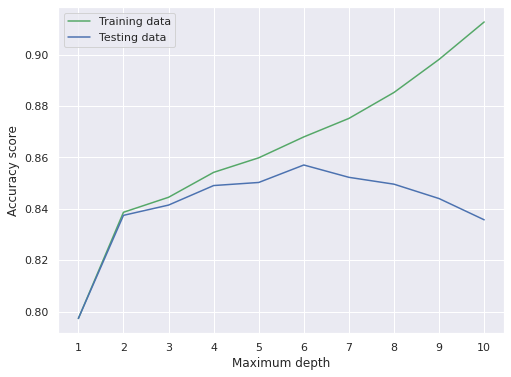

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.868000,0.857067,{'max_depth': 6}
2,0.875200,0.852267,{'max_depth': 7}
3,0.859867,0.850267,{'max_depth': 5}
4,0.885300,0.849600,{'max_depth': 8}
5,0.854200,0.849067,{'max_depth': 4}
6,0.898167,0.844000,{'max_depth': 9}
7,0.844500,0.841467,{'max_depth': 3}
8,0.838667,0.837467,{'max_depth': 2}
9,0.912733,0.835733,{'max_depth': 10}


In [32]:
# view the complete results
results = pd.DataFrame(dtree_clf.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)
x_axis = depth

# plot the mean cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_scores, label='Training data', c='g')
plt.plot(x_axis, test_scores, label='Testing data', c='b')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy score')
plt.xticks(range(1, len(depth) + 1), depth)
plt.legend()
plt.show()

results.set_index(['rank_test_score']).sort_index()[[
    'mean_train_score', 'mean_test_score', 'params'
]]

In [33]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.2%}'.format(
    dtree_clf.best_params_, dtree_clf.best_score_))

Best Parameter: {'max_depth': 6}
Average cross-validation score: 85.71%


In [34]:
y_pred = dtree_clf.predict(X_test)
print('The accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('The precision score: {:.3f}'.format(precision_score(y_test, y_pred, average='macro')))
print('The recall score: {:.3f}'.format(recall_score(y_test, y_pred, average='macro')))
print('The f1 score: {:.3f}'.format(f1_score(y_test, y_pred, average='macro')))

The accuracy score: 0.859
The precision score: 0.819
The recall score: 0.710
The f1 score: 0.744


In [35]:
# Find most significant feature for this Decision Tree
dtree = DecisionTreeClassifier(max_depth=6, random_state=0)
dtree.fit(X_train, y_train)

columns = X_test.columns.tolist()
for i, imp in enumerate(dtree.feature_importances_):
  print('\n{}: {:.2%}'.format(columns[i], imp))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


CreditScore: 0.66%

Age: 41.25%

Tenure: 1.31%

Balance: 6.88%

NumOfProducts: 29.52%

EstimatedSalary: 1.84%

Geography_Germany: 5.28%

Geography_Spain: 0.00%

Gender_Male: 0.50%

HasCrCard_1: 0.00%

IsActiveMember_1: 12.75%


The most important feature is **Age**, then is **NumOfProduct**.

### Random Forest

In [36]:
depth = list(range(1, 21))
param_grid = {'max_depth': depth}
forest = RandomForestClassifier(random_state=0)
forest_clf = GridSearchCV(forest,
                         param_grid,
                         return_train_score=True,)
forest_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Maximum depth')

Text(0, 0.5, 'Accuracy score')

([<matplotlib.axis.XTick at 0x7f8cf4fe5ef0>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20')])

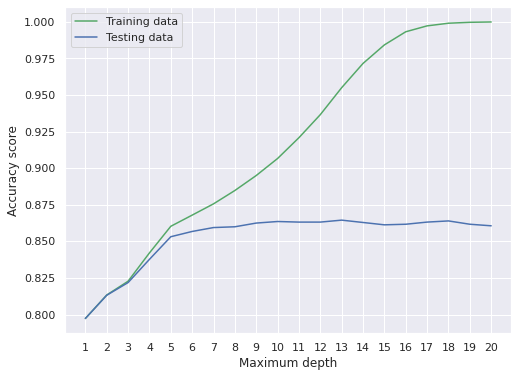

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.955067,0.864533,{'max_depth': 13}
2,0.999100,0.864000,{'max_depth': 18}
3,0.906667,0.863600,{'max_depth': 10}
4,0.936633,0.863200,{'max_depth': 12}
4,0.920900,0.863200,{'max_depth': 11}
6,0.997300,0.863200,{'max_depth': 17}
7,0.971633,0.862933,{'max_depth': 14}
8,0.895033,0.862533,{'max_depth': 9}
9,0.993267,0.861733,{'max_depth': 16}


In [37]:
# view the complete results
results = pd.DataFrame(forest_clf.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)
x_axis = depth

# plot the mean cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_scores, label='Training data', c='g')
plt.plot(x_axis, test_scores, label='Testing data', c='b')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy score')
plt.xticks(range(1, len(depth) + 1), depth)
plt.legend()
plt.show()

results.set_index(['rank_test_score']).sort_index()[[
    'mean_train_score', 'mean_test_score', 'params'
]]

In [38]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.2%}'.format(
    forest_clf.best_params_, forest_clf.best_score_))

Best Parameter: {'max_depth': 13}
Average cross-validation score: 86.45%


In [39]:
y_pred = forest_clf.predict(X_test)
print('The accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('The precision score: {:.3f}'.format(precision_score(y_test, y_pred, average='macro')))
print('The recall score: {:.3f}'.format(recall_score(y_test, y_pred, average='macro')))
print('The f1 score: {:.3f}'.format(f1_score(y_test, y_pred, average='macro')))

The accuracy score: 0.861
The precision score: 0.823
The recall score: 0.714
The f1 score: 0.748


In [40]:
# Find most significant feature for this Decision Tree
forest = RandomForestClassifier(max_depth=13, random_state=0)
forest.fit(X_train, y_train)

columns = X_test.columns.tolist()
for i, imp in enumerate(forest.feature_importances_):
  print('\n{}: {:.2%}'.format(columns[i], imp))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


CreditScore: 12.09%

Age: 26.80%

Tenure: 7.02%

Balance: 13.18%

NumOfProducts: 15.53%

EstimatedSalary: 12.50%

Geography_Germany: 3.34%

Geography_Spain: 1.21%

Gender_Male: 1.94%

HasCrCard_1: 1.61%

IsActiveMember_1: 4.78%


The most important feature is **Age**, then are **NumOfProduct**, **EstimatedSalary**, and **CreditScore**.

### SVM

In [41]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'C': c_range}
svc = SVC(random_state=0)
svc_clf = GridSearchCV(svc,
                       param_grid,
                       return_train_score=True)
svc_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Regularization parameter: C')

Text(0, 0.5, 'Accuracy score')

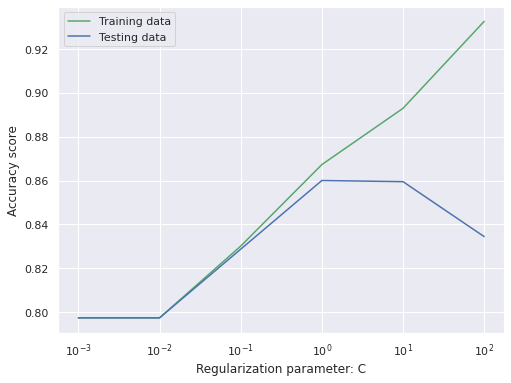

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.867267,0.860000,{'C': 1}
2,0.892933,0.859467,{'C': 10}
3,0.932600,0.834400,{'C': 100}
4,0.830067,0.828667,{'C': 0.1}
5,0.797333,0.797333,{'C': 0.001}
5,0.797333,0.797333,{'C': 0.01}


In [42]:
# view the complete results
results = pd.DataFrame(svc_clf.cv_results_)
test_scores = np.array(results.mean_test_score)
train_scores = np.array(results.mean_train_score)
x_axis = c_range

# plot the mean cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(x_axis, train_scores, label='Training data', c='g')
plt.plot(x_axis, test_scores, label='Testing data', c='b')
plt.legend(loc='best')
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy score')
plt.xscale('log')
plt.show()

results.set_index(['rank_test_score']).sort_index()[[
    'mean_train_score', 'mean_test_score', 'params'
]]

In [43]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.2%}'.format(
    svc_clf.best_params_, svc_clf.best_score_))

Best Parameter: {'C': 1}
Average cross-validation score: 86.00%


In [44]:
y_pred = svc_clf.predict(X_test)
print('The accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('The precision score: {:.3f}'.format(precision_score(y_test, y_pred, average='macro')))
print('The recall score: {:.3f}'.format(recall_score(y_test, y_pred, average='macro')))
print('The f1 score: {:.3f}'.format(f1_score(y_test, y_pred, average='macro')))

The accuracy score: 0.858
The precision score: 0.841
The recall score: 0.691
The f1 score: 0.729


## Conclusion

|Machine Learning Models|Hyperparamter|Precision| Recall| F1 Score | Avg. CV Score | Feature Importance |
|--|--|--|--|--|--|--|
|K-Nearest Neighbors| k = 9 | 0.796 | 0.694 | 0.725 | 84.93% |
|Logistic Regression|C = 0.1, penalty = L1 | 0.729  | 0.590 | 0.609  | 81.07% |
|Decision Tree | max_depth = 6 | 0.819 | 0.710 | 0.744 | 85.71% |Age, NumOfProduct|
|Random Forest | max_depth = 13 | 0.823 | 0.714 | 0.748 | 86.45% | Age, NumOfProduct, EstimatedSalary, CreditScore |
|Support Vector Machine| C = 1| 0.841 | 0.691 | 0.729 | 86.00% |

According to the comparison table, the optimal machine learning model is **Random Forest** with **Accuracy 86.45%** and **F1 Score 0.748**.

## Deep Learning

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
np.random.seed(0)

In [46]:
X_train.shape

(7500, 11)

### Create Model

In [47]:
# Initialize
dl = Sequential()

# Adding the input layer
dl.add(Dense(12, input_dim = 11, activation='relu'))

# Adding the hidden layer
dl.add(Dense(8, activation='relu'))

# Adding the last layer
dl.add(Dense(1, activation='sigmoid'))

### Compile Model

In [48]:
# Compile 
dl.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

### Fit Model

In [49]:
dl.fit(X_train, y_train, epochs = 100, batch_size = 30)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5691 - accuracy: 0.7180
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.8043
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8098
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8167
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8266
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8437
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8497
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8480
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8476
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3463 - accura

### Prediction

In [50]:
from sklearn.metrics import accuracy_score
y_pred = dl.predict(X_test)
y_pred = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred)
print('The accuracy score: {:.2%}'.format(accuracy))

The accuracy score: 86.16%
